In [15]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd

In [17]:
car_df = pd.read_csv('preprocessed_hyundai_0523.csv')
car_df

,car_url,car_area,car_no,car_brand,car_name,name_datailed,new_price,price,year,use,...,flood,usage,change,insurance,sales_corp,sales_loca,lat,lng,options,options_count
0,23004747,대구,67구3425,현대,더 뉴 아반떼 AD,Smartstream G1.6 프리미엄,1913,1550,2019,42,...,없음,없음,1,없음,에이스모터스,대구 서구,35.871600,128.559100,"['내비게이션', '스마트키', '오토라이트', '주차감지센서', '가죽시트', '...",8
1,23004725,전남,22누5618,현대,아반떼MD,M16 GDi LUXURY,1677,520,2011,136,...,없음,없음,4,있음,정훈모터스,전남,34.815900,126.462900,"['내비게이션', '오토라이트', '주차감지센서', '열선시트', '사이드커튼에어백...",8
2,23004718,경기,54소7801,현대,아반떼MD,M16 GDi LUXURY,1620,470,2011,133,...,없음,없음,1,있음,럭키모터스,경기 안양시,37.393853,126.957060,"['내비게이션', '오토라이트', '가죽시트', '열선시트', '사이드커튼에어백',...",8
3,23004715,경기,228오5426,현대,올 뉴 투싼,디젤(e-VGT R)2.0 2WD 모던,2359,2100,2019,37,...,없음,있음,1,없음,DK모터스,경기 수원시,37.263332,127.028747,"['썬루프', '내비게이션', '스마트키', '오토라이트', '가죽시트', '열선시...",8
4,23004698,부산,69거3716,현대,더 뉴 아반떼,1.6 GDi 모던 기본형,1921,980,2015,85,...,없음,없음,1,있음,해운대모터스,부산광역시 남구,35.136100,129.084400,"['썬루프', '내비게이션', '스마트키', '주차감지센서', '가죽시트', '열선...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21679,11153036,서울,20나8831,현대,그랜저HG,HG240 모던,3369,1550,2013,110,...,없음,없음,1,있음,주식회사 참사랑상사,서울 강서구,37.550900,126.849700,"['내비게이션', '스마트키', '주차감지센서', '가죽시트', '열선시트', '통...",8
21680,11131156,인천,79버2223,현대,에어로타운,19인승,6022,2650,2007,182,...,없음,없음,1,없음,경인자동차매매상사,인천 부평구,37.507022,126.722007,[],0
21681,11126723,경기,81루7739,현대,포터2,기타,1390,890,2012,118,...,없음,없음,5,있음,성원자동차,경기도 수원시,37.263332,127.028747,[],0
21682,10516866,경기,64머6775,현대,에쿠스(신형),VL500 프레스티지 리무진,14545,1600,2010,142,...,없음,없음,3,있음,(주)카플러스경매클럽,경기 고양시,37.658186,126.831945,"['내비게이션', '스마트키', '오토라이트', '주차감지센서', '가죽시트', '...",8


In [18]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21684 entries, 0 to 21683
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_url        21684 non-null  int64  
 1   car_area       21684 non-null  object 
 2   car_no         21684 non-null  object 
 3   car_brand      21684 non-null  object 
 4   car_name       21684 non-null  object 
 5   name_datailed  21684 non-null  object 
 6   new_price      21684 non-null  int64  
 7   price          21684 non-null  int64  
 8   year           21684 non-null  int64  
 9   use            21684 non-null  int64  
 10  depreciation   21684 non-null  int64  
 11  mileage        21684 non-null  int64  
 12  fuel           21684 non-null  object 
 13  forecast_min   21684 non-null  int64  
 14  forecast_max   21684 non-null  int64  
 15  car_type       21684 non-null  object 
 16  car_cc         21684 non-null  int64  
 17  color          21684 non-null  object 
 18  trans 

- car_url: KB차차차 중고차 구분 코드 (f'https://www.kbchachacha.com/public/car/detail.kbc?carSeq={car_url}'로 접근가능)
- car_area: 자동차 번호판 등록지
- car_no: 자동차 번호
- car_brand: 브랜드명
- car_name: 차량 모델명
- name_detailed: 옵션명
- price: 중고차 가격
- year: 중고차 연식
- use: 새차사고 사용기간
- depreciation: 감가율
- mileage: 중고차 주행거리
- fuel: 연료타입
- forecast_min: KB차차차 AI 예측 최소가
- forecase_max: KB차차차 AI 예측 최대가
- car_type: 차량크기
- car_cc: 배기량
- color: 차량색상
- trans: 변속기
- loss: 전손이력(전부 손해)
- flood: 침수이력
- usage: 용도이력
- change: 사용자변경횟수
- insurance: 보험사고이력
- sales_corp: 판매업체
- sales_loca: 판매업체 위치
- option: 차량옵션

In [19]:
car_df.describe()

,car_url,new_price,price,year,use,depreciation,mileage,forecast_min,forecast_max,car_cc,change,lat,lng,options_count
count,2.168400e+04,21684.00000,21684.000000,21684.000000,21684.000000,21684.000000,2.168400e+04,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000
mean,2.252909e+07,2894.12553,1382.228094,2014.392824,94.159103,49.462922,1.279906e+05,1150.235196,1474.866906,1418.388489,2.398312,36.566147,127.350139,5.171463
std,9.465258e+05,1574.85032,903.510283,3.749513,43.461582,23.607227,9.006988e+04,709.939175,802.912372,2569.078419,2.036026,0.995723,0.795467,3.351260
min,1.005894e+07,875.00000,110.000000,2003.000000,1.000000,0.000000,1.000000e+01,49.000000,173.000000,0.000000,0.000000,33.493057,126.384755,0.000000
25%,2.239605e+07,1880.00000,750.000000,2012.000000,58.000000,30.000000,7.320775e+04,626.750000,887.000000,0.000000,1.000000,35.248350,126.849700,1.000000
50%,2.287792e+07,2528.00000,1230.000000,2015.000000,90.000000,51.000000,1.135875e+05,1012.500000,1336.000000,1591.000000,2.000000,37.263332,127.028747,8.000000
75%,2.295048e+07,3340.00000,1770.000000,2018.000000,127.000000,69.000000,1.620822e+05,1509.000000,1881.250000,2359.000000,3.000000,37.342100,127.356300,8.000000
max,2.300475e+07,31269.00000,19700.000000,2023.000000,227.000000,96.000000,1.369350e+06,7983.000000,9344.000000,229339.000000,22.000000,38.206957,129.360400,8.000000


In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

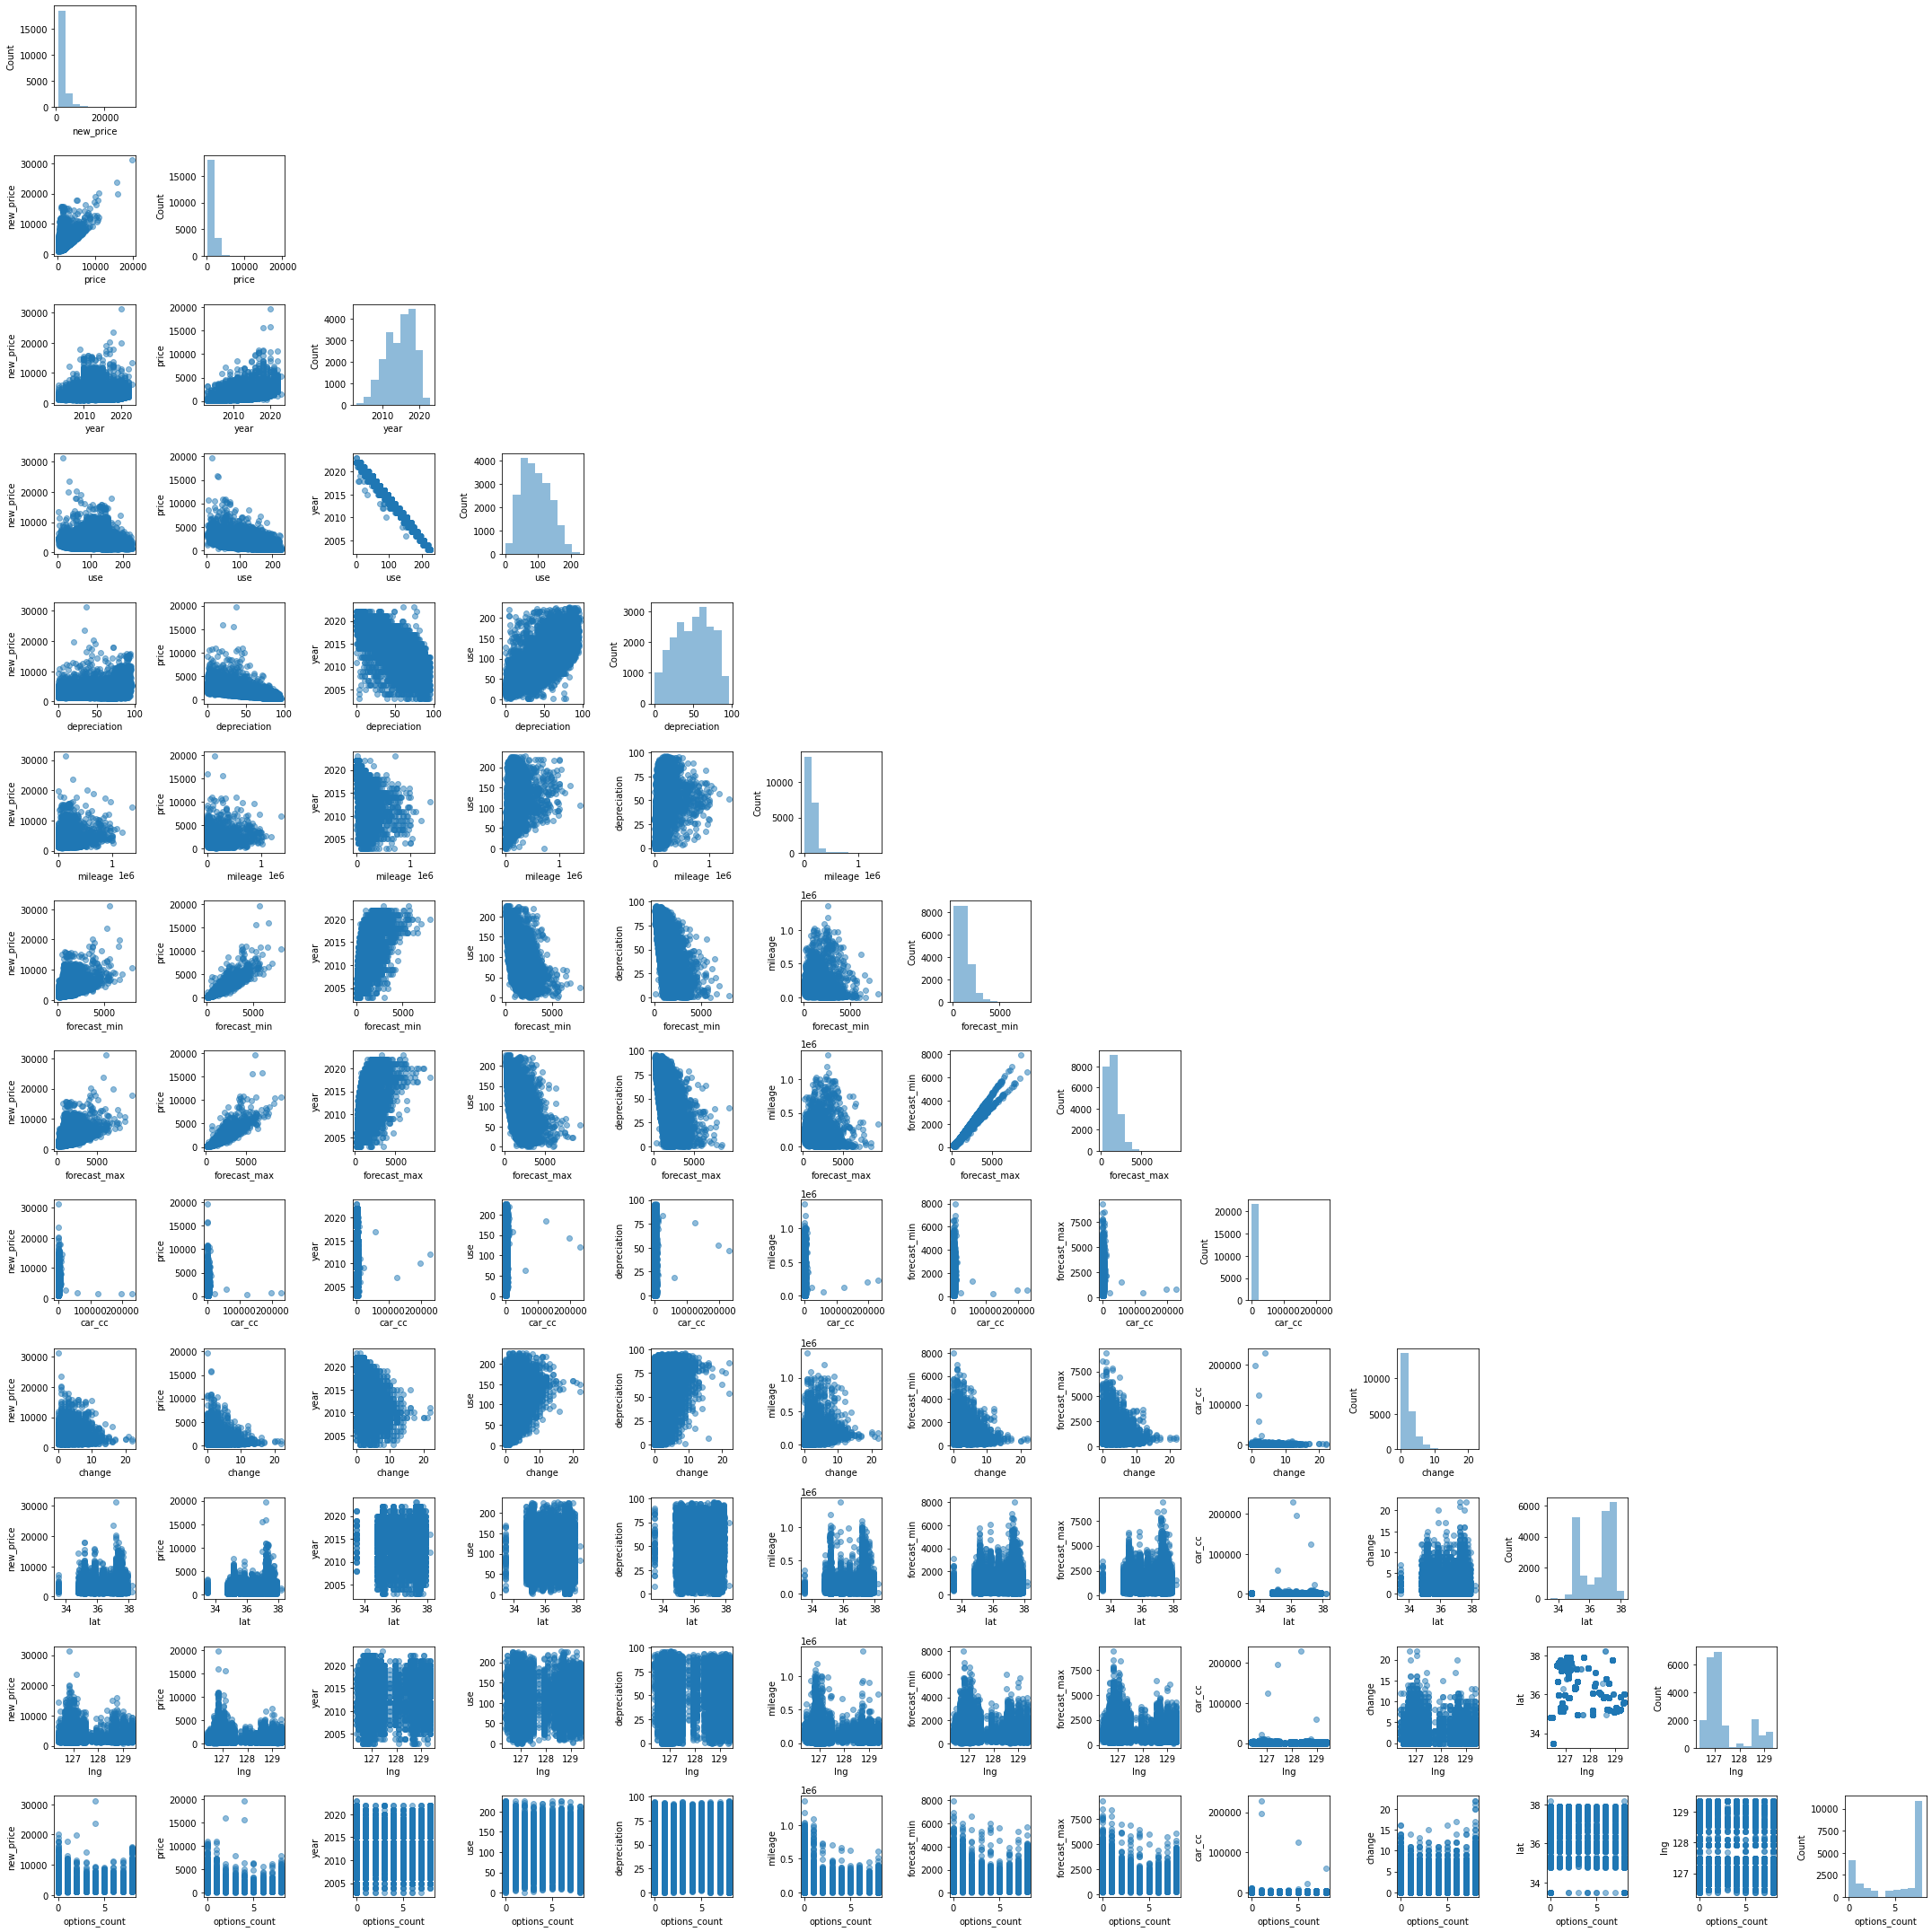

In [21]:
cols = ['new_price','price','year','use','depreciation','mileage','forecast_min','forecast_max','car_cc','change','lat','lng','options_count']

scatterplotmatrix(car_df[cols].values, figsize =(30,30), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
x = car_df.drop(columns=['price','car_area','car_no', 'car_brand', 'car_name', 'name_datailed', 'fuel', 'car_type', 'color', 'trans', 'loss', 'flood', 'usage','insurance', 'sales_corp', 'sales_loca', 'options'])
y = car_df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

In [91]:
x_train

,car_url,new_price,year,use,depreciation,mileage,car_cc,change,lat,lng,options_count
1077,22992727,1608,2014,99,77,174820,1582,6,37.263332,127.028747,7
8177,22916662,1761,2013,110,58,108999,1999,3,36.346800,127.415700,6
6449,22936692,5769,2012,125,87,241000,3778,9,35.819900,127.109000,8
10193,22886540,2822,2016,78,55,118059,1685,1,36.642117,127.489174,2
15916,22426745,4836,2016,70,51,47573,3342,2,37.379889,126.803225,8
...,...,...,...,...,...,...,...,...,...,...,...
4023,22965056,1563,2018,47,13,75657,1591,0,36.362200,127.356300,8
7259,22927725,1840,2019,36,6,46803,1598,3,35.238200,128.692500,7
21584,11716618,3750,2015,96,56,126820,2359,3,37.263332,127.028747,8
3775,22967182,2240,2013,108,50,143543,2999,5,36.362200,127.356300,8


In [92]:
y_train

,price
1077,370
8177,740
6449,750
10193,1270
15916,2370
...,...
4023,1360
7259,1730
21584,1650
3775,1120


## LinearRegression

In [93]:
# https://ebbnflow.tistory.com/140

lr = LinearRegression(fit_intercept=True, normalize = True, copy_X = True)
lr.fit(x_train, y_train)
print('LinearRegression 정확도 :', lr.score(x_train, y_train))

LinearRegression 정확도 : 0.8102092398845305


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [94]:
y_predict = lr.predict(x_test)

print('LinearRegression test 정확도:', lr.score(x_test, y_test))
print('LinearRegression test 정확도:', r2_score(y_test, lr.predict(x_test)))

LinearRegression test 정확도: 0.8107686521743942
LinearRegression test 정확도: 0.8107686521743942


In [95]:
mean_absolute_error(y_test, y_predict)

236.77778295643034

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


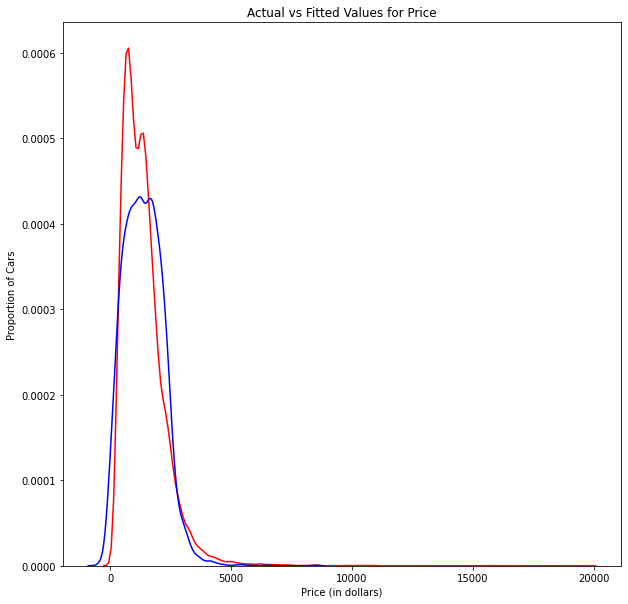

In [96]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(car_df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## GradientBoostingRegresoor

In [97]:
num_estimators = [100, 500, 1000]
learn_rates = [0.1, 0.5, 1]
max_depths = [1,2,34]
min_samples_leaf = [5, 10, 15]
min_samples_split = [2, 5, 10]

param_grid = {'n_estimators': num_estimators, 
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split
}

grid_search = GridSearchCV(GradientBoostingRegressor(loss = 'huber'),
                           param_grid, cv=3, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [98]:
gb = GradientBoostingRegressor(min_samples_leaf=10, min_samples_split=5, learning_rate=0.5, max_depth=3, n_estimators=1000)
gb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.5, min_samples_leaf=10,
                          min_samples_split=5, n_estimators=1000)

In [99]:
y_gb_predict = gb.predict(x_test)

In [100]:
print('gb train accuract:', gb.score(x_train, y_train))

gb train accuract: 0.9997640775293433


In [101]:
print('gb test accuract:', gb.score(x_test, y_test))
print('gb test accuract:', r2_score(y_test, gb.predict(x_test)))

gb test accuract: 0.9959348990809792
gb test accuract: 0.9959348990809792


In [54]:
mean_absolute_error(y_test, y_gb_predict)

23.599026674273606

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


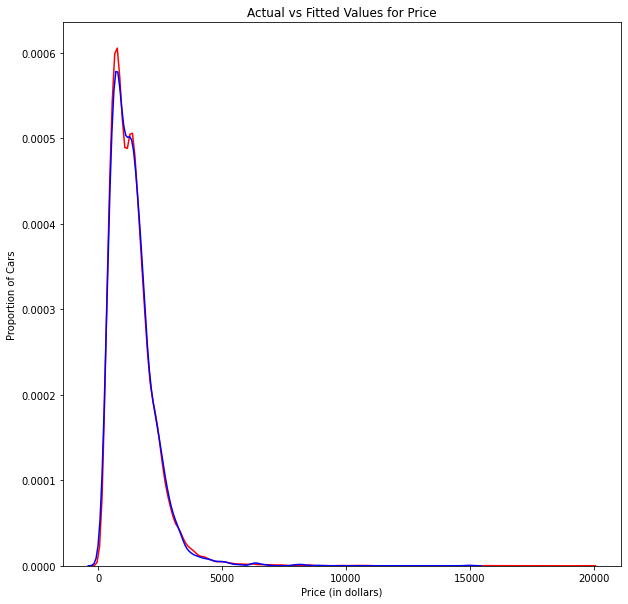

In [102]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(car_df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_gb_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## RandomForst

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators = 50, random_state  = 42)
rf_clf.fit(x_train, y_train)
print('RandomForest train 정확도:', rf_clf.score(x_train, y_train))

pred = rf_clf.predict(x_test)
print('RandomForest test 정확도:', rf_clf.score(x_test, y_test))
print('RandomForest test 정확도:', r2_score(y_test, rf_clf.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForest train 정확도: 0.998355975656081
RandomForest test 정확도: 0.9881772718630242
RandomForest test 정확도: 0.9881772718630242


In [104]:
mean_absolute_error(y_test, pred)

10.7631496426101

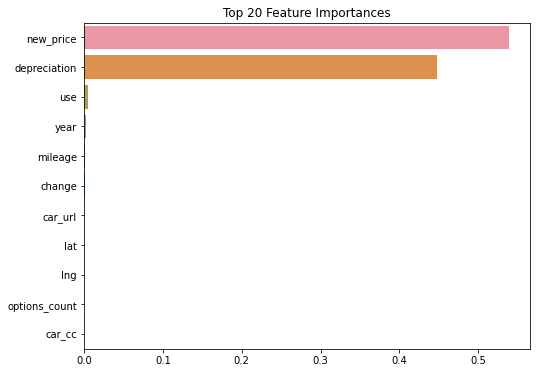

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


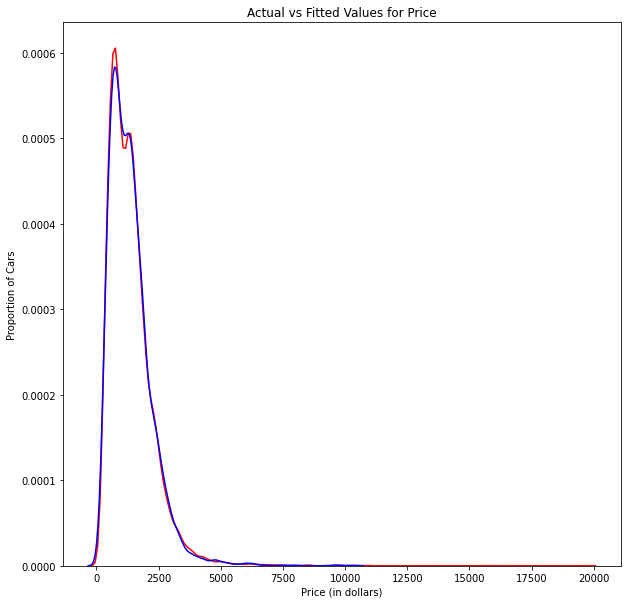

In [106]:
#다중회귀
# X = car_df[['mileage']]
# Y = car_df['price']
# Z = car_df[['year', 'use', 'depreciation', 'new_price']]
# lm.fit(X,Y)
# lm.fit(Z, car_df['price'])
# Y = lm.predict(Z)

plt.figure(figsize=(10, 10))

ax1 = sns.distplot(car_df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## XGBRegressor

In [107]:
import xgboost
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt

In [108]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(x_train,y_train)


[06:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

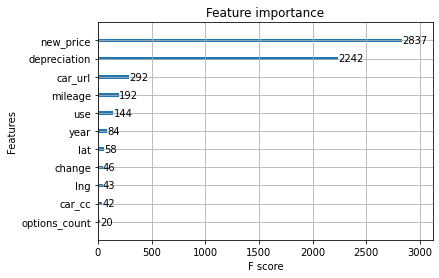

In [109]:
xgboost.plot_importance(xgb_model)


In [110]:
predictions = xgb_model.predict(x_test)
predictions

array([ 452.876, 1589.695, 1084.354, ..., 1882.495, 4823.288, 1366.245],
      dtype=float32)

In [111]:
r_sq = xgb_model.score(x_train, y_train)
print('XBoost train 정확도: ',r_sq)
print('Xboost test 정화도: ',explained_variance_score(predictions,y_test))

XBoost train 정확도:  0.9996848773853451
Xboost test 정화도:  0.9964361107708554


In [112]:
mean_absolute_error(y_test, predictions)

13.061169325934321

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


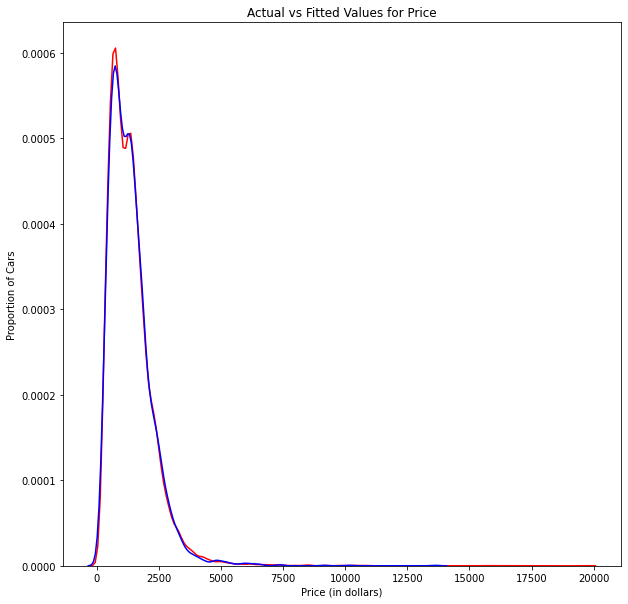

In [113]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(car_df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## LGBM

In [64]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(x_train, y_train)

train_set = lgb.Dataset(x_train, label=y_train)

# X_test 대신에 X_val(for validation)도 가능하다
test_set = lgb.Dataset(x_test, label=y_test)
params = {
    'num_leaves': 80,
    'objective': 'regression',
    'min_data_in_leaf': 200,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'metric': 'l2',
    'num_threads': 16
}

model = lgb.train(params, train_set, num_boost_round=5000, verbose_eval=50)

y_pred = model.predict(x_test)


y_pred = lgb_clf.predict(x_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
print('lightgbm train 정확도:', rf_clf.score(x_train, y_train))

print('lightgbm test 정확도:', rf_clf.score(x_test, y_test))
print('lightgbm test 정확도:', r2_score(y_test, rf_clf.predict(x_test)))

## Voting


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)], voting = 'soft')

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('voting 분류기 정확도', accuracy_score(y_test, pred))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(x_train, y_train)
  pred = classifier.predict(x_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))



